In [1]:
import numpy as np
import matplotlib.pyplot as plt

from temporal_difference import TDAgent
from envs.gridworld import GridworldEnv
from utils.grid_visualization import visualize_value_function, visualize_policy

np.random.seed(0)

In [2]:
nx, ny = 4, 4
env = GridworldEnv([ny, nx])

In [3]:
td_agent = TDAgent(gamma=1.0,
                   num_states=nx * ny,
                   num_actions=4,
                   epsilon=1.0,
                   lr=1e-2)

In [4]:
def run_episode(env, agent):
    env.reset()
    states = []
    actions = []
    rewards = []
    
    while True:
        state = env.observe()
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        
        if done:
            break
    
    episode = (states, actions, rewards)
    agent.update(episode)

In [5]:
total_eps = 4000
log_every = 500

def run_episodes(env, agent, total_eps, log_every):
    mc_values = []
    log_iters = []
    
    for i in range(total_eps+1):  
        run_episode(env, agent)

        if i % log_every == 0:
            mc_values.append(agent.v.copy())
            log_iters.append(i)
    
    info = dict()
    info['values'] = mc_values
    info['iters'] = log_iters
    return info

In [6]:
td_agent.reset_values()
info = run_episodes(env, td_agent, total_eps, log_every)

In [7]:
log_iters = info['iters']
mc_values = info['values']

In [8]:
from tensorized_dp import TensorDP

dp_agent = TensorDP()
dp_agent.set_env(env)
v_pi = dp_agent.policy_evaluation()

Tensor DP agent initialized
Environment spec:  Num. state = 16 | Num. actions = 4 


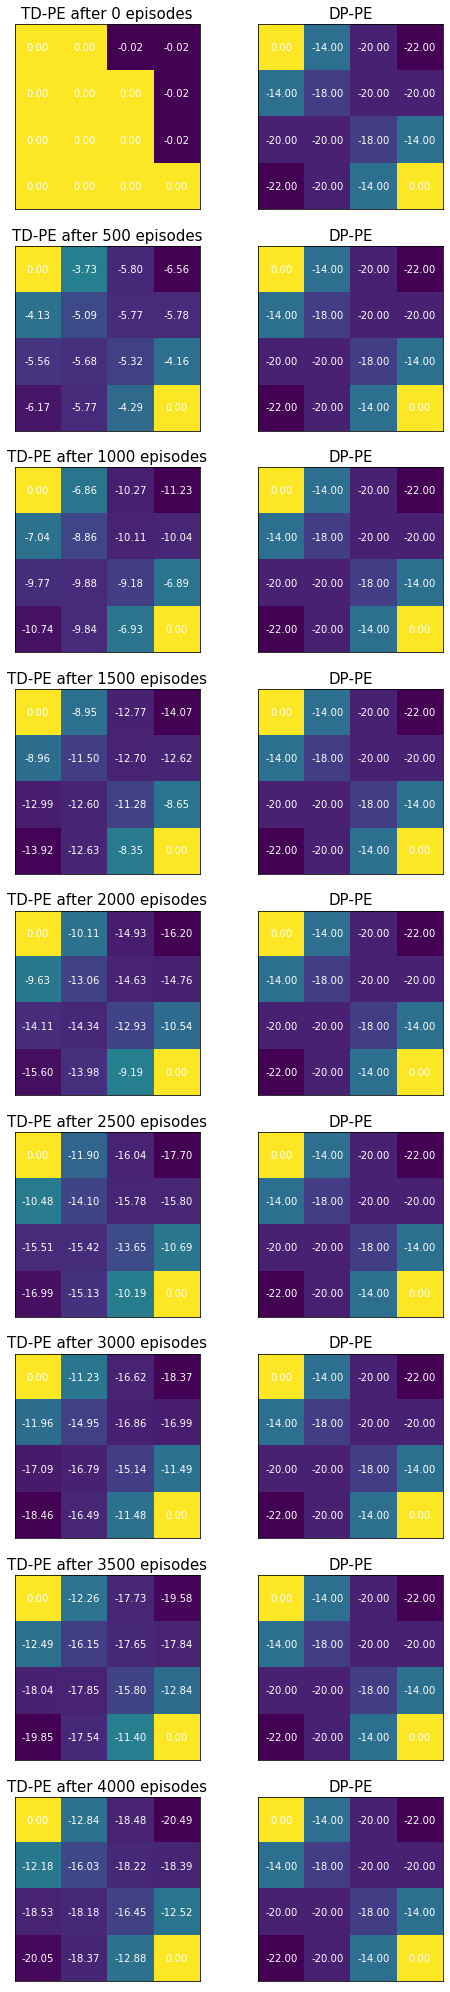

In [9]:
n_rows = len(log_iters)
figsize_multiplier = 4


fig, ax = plt.subplots(n_rows, 2, figsize=(2*figsize_multiplier, 
                                           n_rows*figsize_multiplier))

for viz_i, i in enumerate(log_iters):
    visualize_value_function(ax[viz_i, 0], mc_values[viz_i], nx, ny,
                            plot_cbar=False)
    _ = ax[viz_i, 0].set_title("TD-PE after {} episodes".format(i), size=15)

    visualize_value_function(ax[viz_i, 1], v_pi, nx, ny,
                             plot_cbar=False)
    _ = ax[viz_i, 1].set_title("DP-PE", size=15)

#fig.tight_layout()